In [9]:
# Required
# pip install scikit-learn --upgrade

     |████████████████████████████████| 23.0MB 3.2MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import PrecisionRecallDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/validation_dataset.pkl')
model = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/model.pkl')

In [3]:
features = ['age', 'gender','alcohol_usage', 'smoke', 'BMI', 'sleep_hour',
            'race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian']
target = 'HBP'

In [4]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = round(TP/(TP+FN),2)
# Specificity or true negative rate
TNR = round(TN/(TN+FP),2)
# Precision or positive predictive value
PPV = round(TP/(TP+FP),2)
# Negative predictive value
NPV = round(TN/(TN+FN),2)
# Fall out or false positive rate
FPR = round(FP/(FP+TN),2)
# False negative rate
FNR = round(FN/(TP+FN),2)

# AUC
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
AUC = round(roc_auc_score(y_test, probs),2)

precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
f1 = round(f1_score(y_test, y_pred),2)
acc = round(model.best_score_, 2)

print("----Precision : {precision}".format(precision=precision))
print("----Recall : {recall}".format(recall=recall))
print("----F1 : {f1}".format(f1=f1))
print("----Accurancy : {acc}".format(acc=acc))
print("----TPR : {TPR}".format(TPR=TPR))
print("----TNR : {TNR}".format(TNR=TNR))
print("----PPV : {PPV}".format(PPV=PPV))
print("----NPV : {NPV}".format(NPV=NPV))
print("----FPR : {FPR}".format(FPR=FPR))
print("----FNR : {FNR}".format(FNR=FNR))
print("----AUC : {AUC}".format(AUC=AUC))
print('\n')

----Precision : 0.75
----Recall : 0.77
----F1 : 0.76
----Accurancy : 0.8
----TPR : 0.77
----TNR : 0.71
----PPV : 0.75
----NPV : 0.73
----FPR : 0.29
----FNR : 0.23
----AUC : 0.8




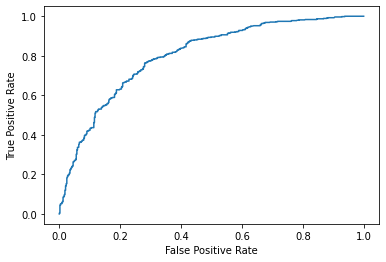

In [6]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

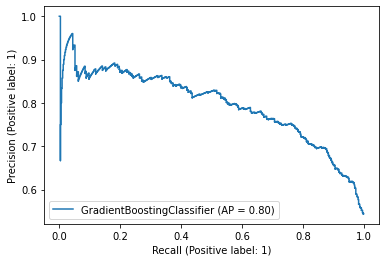

In [9]:
y_score = model.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="GradientBoostingClassifier")

In [11]:
df = pd.DataFrame(data=['FNR','TPR','FPR','TNR','AUC'], columns=['Metric'])

df['Value'] = 0
df.loc[(df['Metric'] == 'FNR'), 'Value'] = FNR
df.loc[(df['Metric'] == 'TPR'), 'Value'] = TPR
df.loc[(df['Metric'] == 'FPR'), 'Value'] = FPR
df.loc[(df['Metric'] == 'TNR'), 'Value'] = TNR
df.loc[(df['Metric'] == 'AUC'), 'Value'] = AUC

df

,Metric,Value
0,FNR,0.23
1,TPR,0.77
2,FPR,0.29
3,TNR,0.71
4,AUC,0.80
